In [33]:
import pandas as pd
import os
import numpy as np
import requests
from fredapi import Fred
import json
import matplotlib.pyplot as plt
import yfinance as yf

In [85]:
spy = yf.Ticker('SPY')
spy.info['open']

big_data = []
interested_stocks = ['SPY', 'AAPL', 'NVDA', 'BAC', 'DFS', 'JPM']

for stock in interested_stocks:
    data = yf.download(stock, group_by = "ticker", period = '6y')
    data['ticker'] = stock
    big_data.append(data)

# Combine all dataframes into a single dataframe
df = pd.concat(big_data)
df
# df.to_csv('ticker.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker             SPY                                                 ticker  \
Price             Open        High         Low       Close      Volume          
Date                                                                            
2019-03-15  256.386332  257.912534  256.194392  257.090027  81309000.0    SPY   
2019-03-18  257.309252  258.323698  257.080776  258.022095  62199800.0    SPY   
2019-03-19  259.100536  259.877331  257.181335  258.086090  90268100.0    SPY   
2019-03-20  257.866730  259.091356  256.185152  257.309235  84609200.0    SPY   
2019-03-21  256.477687  260.626785  256.431975  260.215546  79550400.0    SPY   
...                ...         ...         ...         ...         ...    ...   
2025-03-10         NaN         NaN         NaN         NaN         NaN    JPM   
2025-03-11         NaN         NaN         NaN         NaN         NaN    JPM   
2025-03-12         NaN         NaN         NaN         NaN         NaN    JPM   
2025-03-13         NaN         NaN         NaN         NaN         NaN    JPM   
2025-03-14         NaN         NaN         NaN         NaN         NaN    JPM   

Ticker     AAPL                 ...  DFS                               JPM  \
Price      Open High Low Close  ... Open High Low Close Volume        Open   
Date                            ...                                          
2019-03-15  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN         NaN   
2019-03-18  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN         NaN   
2019-03-19  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN         NaN   
2019-03-20  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN         NaN   
2019-03-21  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN         NaN   
...         ...  ...  ..   ...  ...  ...  ...  ..   ...    ...         ...   
2025-03-10  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN  236.210007   
2025-03-11  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN  231.750000   
2025-03-12  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN  234.000000   
2025-03-13  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN  229.300003   
2025-03-14  NaN  NaN NaN   NaN  ...  NaN  NaN NaN   NaN    NaN  228.119995   

Ticker                                                      
Price             High         Low       Close      Volume  
Date                                                        
2019-03-15         NaN         NaN         NaN         NaN  
2019-03-18         NaN         NaN         NaN         NaN  
2019-03-19         NaN         NaN         NaN         NaN  
2019-03-20         NaN         NaN         NaN         NaN  
2019-03-21         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...  
2025-03-10  237.509995  228.699997  232.220001  18887200.0  
2025-03-11  233.320007  226.690002  229.139999  18143000.0  
2025-03-12  234.320007  227.259995  227.899994  16054000.0  
2025-03-13  229.500000  224.229996  225.190002  16467900.0  
2025-03-14  233.139999  227.580002  232.440002  11959300.0  

[9054 rows x 31 columns]

In [20]:
current_working = os.getcwd()
pathing = '/key/fred_key.json'

In [22]:
key_path  = os.path.join(current_working+ pathing)

with open(key_path) as f:
    config = json.load(f)

key = config['fred_key']

fred = Fred(api_key=key)

sp500 = fred.get_series('SP500')
df = pd.DataFrame(sp500).reset_index()
df.rename(columns={'index': 'date', 0: 'price'}, inplace=True)

df = df[df['date'] > '2020-01-01']
date_data = df['date']
price_data = df['price']
price_data = price_data.astype(float)
data = df[round(price_data).apply(lambda x: x % 2 == 0)]
data

,date,price
1253,2020-01-02,3257.85
1255,2020-01-06,3246.28
1260,2020-01-13,3288.13
1264,2020-01-17,3329.62
1267,2020-01-22,3321.75
...,...,...
2600,2025-03-03,5849.72
2601,2025-03-04,5778.15
2604,2025-03-07,5770.20
2606,2025-03-11,5572.07


/var/folders/hs/6ty1rvvs0gg_7dsvkmnl15dr0000gn/T/ipykernel_72097/965930200.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])


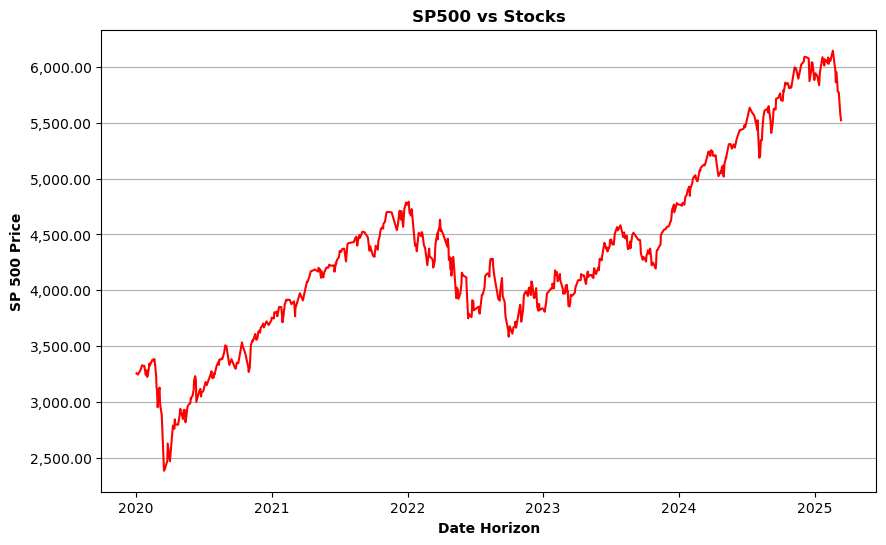

In [29]:
def sp500(dates = date_data, price = price_data):
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Correct way to set figure size
    ax1.plot(data['date'], data['price'], color ='red')
    ax1.set_ylabel('SP 500 Price', fontweight= 'bold')
    ax1.set_xlabel('Date Horizon', fontweight = 'bold')
    ax1.set_title('SP500 vs Stocks', fontweight = 'bold')
    ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])
    ax1.grid(axis = 'y')


sp500()